<a href="https://colab.research.google.com/github/Vishv05/Prodigy-InfoTech-Data-Science-Internship/blob/main/Task-04/Task_04_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


First 5 rows:
   2401  Borderlands  Positive  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

  im getting on borderlands and i will murder you all ,  
0  I am coming to the borders and I will kill you...     
1  im getting on borderlands and i will kill you ...     
2  im coming on borderlands and i will murder you...     
3  im getting on borderlands 2 and i will murder ...     
4  im getting into borderlands and i can murder y...     

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   2401                                                   74681 non-null  int64 
 1   Borderlands                                            7

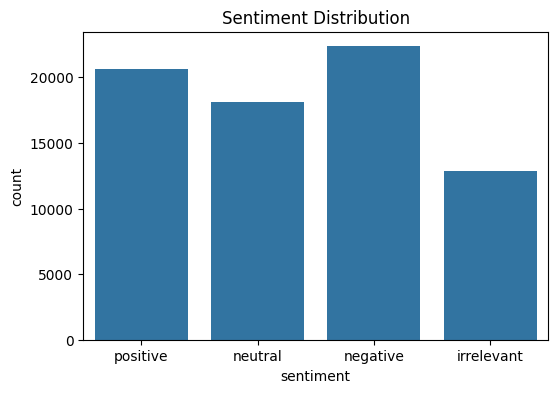


Accuracy Score:
0.6823434015811879

Classification Report:
              precision    recall  f1-score   support

  irrelevant       0.69      0.51      0.59      2624
    negative       0.72      0.76      0.74      4463
     neutral       0.63      0.66      0.64      3589
    positive       0.69      0.73      0.71      4123

    accuracy                           0.68     14799
   macro avg       0.68      0.66      0.67     14799
weighted avg       0.68      0.68      0.68     14799



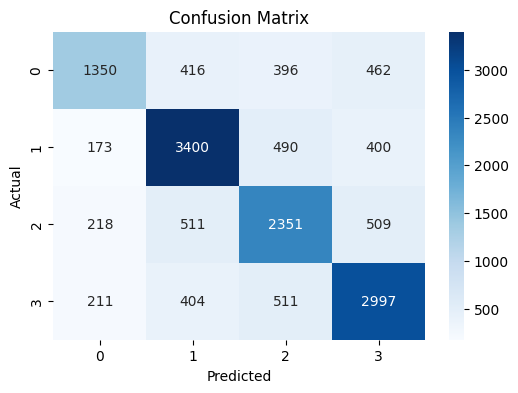

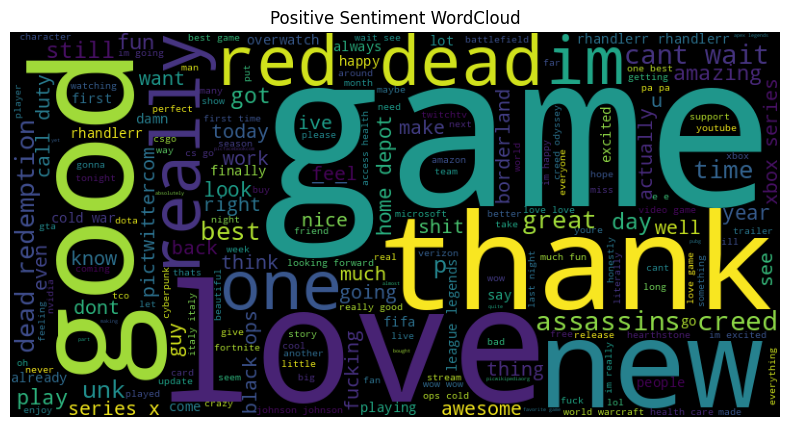

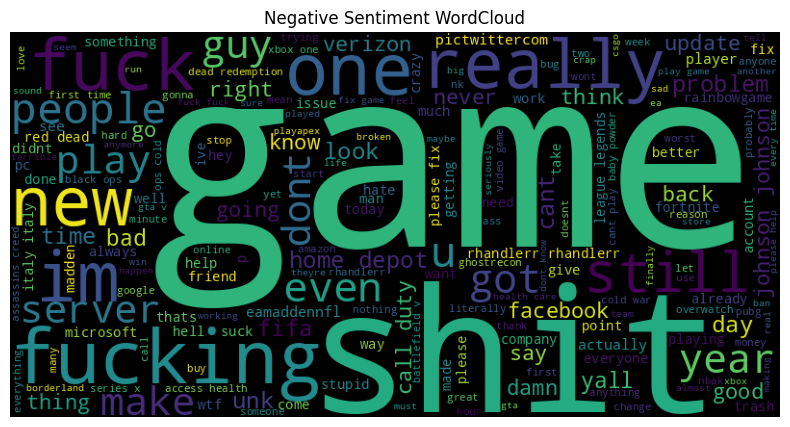


Model successfully analyzed sentiment patterns in social media data.


In [1]:
# ==========================================================
# Task-04: Sentiment Analysis on Social Media Data
# Prodigy InfoTech – Data Science Internship
# Intern: Vishv Bhavsar
# ==========================================================

# =========================
# 1. Import Libraries
# =========================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

# =========================
# 2. Load Dataset
# =========================
df = pd.read_csv("twitter_training.csv")

print("First 5 rows:")
print(df.head())

print("\nDataset Info:")
print(df.info())

# Rename columns if needed
df.columns = ["id", "topic", "sentiment", "text"]

# =========================
# 3. Data Cleaning
# =========================

# Remove missing values
df = df.dropna()

# Keep only relevant columns
df = df[["text", "sentiment"]]

# Convert sentiment to lowercase
df["sentiment"] = df["sentiment"].str.lower()

# =========================
# 4. Text Preprocessing
# =========================

stop_words = set(stopwords.words("english"))

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)  # Remove URLs
    text = re.sub(r"@\w+", "", text)     # Remove mentions
    text = re.sub(r"#", "", text)        # Remove hashtag symbol
    text = re.sub(r"[^\w\s]", "", text)  # Remove punctuation
    text = re.sub(r"\d+", "", text)      # Remove numbers

    words = text.split()
    words = [word for word in words if word not in stop_words]
    return " ".join(words)

df["clean_text"] = df["text"].apply(clean_text)

print("\nAfter Cleaning:")
print(df.head())

# =========================
# 5. Visualize Sentiment Distribution
# =========================
plt.figure(figsize=(6,4))
sns.countplot(x="sentiment", data=df)
plt.title("Sentiment Distribution")
plt.show()

# =========================
# 6. Feature Engineering (TF-IDF)
# =========================
vectorizer = TfidfVectorizer(max_features=5000)

X = vectorizer.fit_transform(df["clean_text"])
y = df["sentiment"]

# =========================
# 7. Train-Test Split
# =========================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# =========================
# 8. Train Model
# =========================
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# =========================
# 9. Predictions
# =========================
y_pred = model.predict(X_test)

# =========================
# 10. Evaluation
# =========================
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# =========================
# 11. WordCloud Visualization
# =========================

positive_text = " ".join(df[df["sentiment"]=="positive"]["clean_text"])
negative_text = " ".join(df[df["sentiment"]=="negative"]["clean_text"])

plt.figure(figsize=(10,5))
plt.imshow(WordCloud(width=800, height=400).generate(positive_text))
plt.title("Positive Sentiment WordCloud")
plt.axis("off")
plt.show()

plt.figure(figsize=(10,5))
plt.imshow(WordCloud(width=800, height=400).generate(negative_text))
plt.title("Negative Sentiment WordCloud")
plt.axis("off")
plt.show()

# =========================
# 12. Conclusion
# =========================
print("\nModel successfully analyzed sentiment patterns in social media data.")